### Assignment 2A

Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset 

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [4]:
# Step 1: Load the QMNIST dataset using torchvision
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the QMNIST training and test datasets
train_data = datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Creating data loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=True)


## Iterating and Visualizing the Dataset

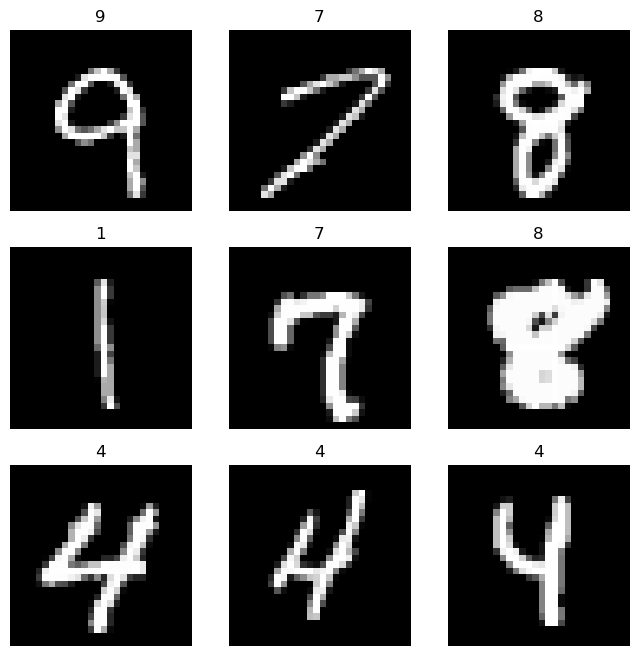

In [6]:
# Define the label map (0-9 are digits, so no need for custom names)
labels_map = {i: str(i) for i in range(10)}

# Create the figure
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

# Plot random images from the training dataset
for i in range(1, cols * rows + 1):
    # Randomly pick an image from the train dataset
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    
    # Add a subplot in the grid
    figure.add_subplot(rows, cols, i)
    
    # Set the title and plot the image
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

# Show the plot
plt.show()


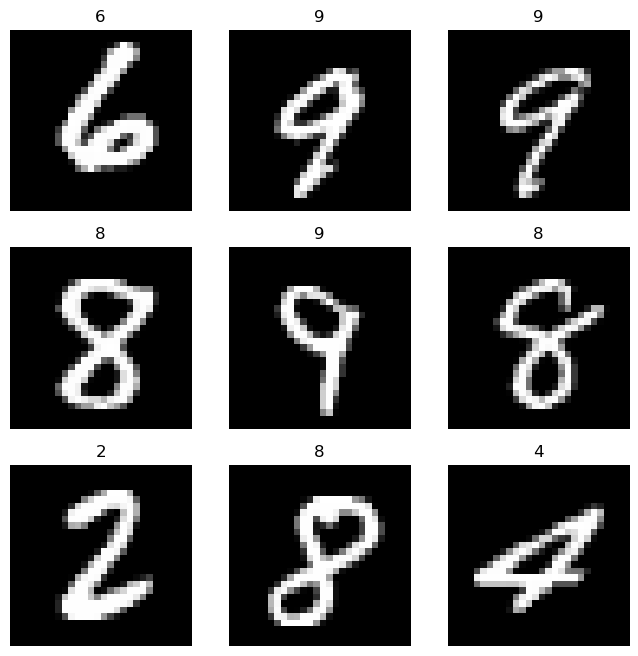

In [10]:
# Define the label map (0-9 are digits, so no need for custom names)
labels_map = {i: str(i) for i in range(10)}

# Create the figure
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

# Plot random images from the test dataset
for i in range(1, cols * rows + 1):
    # Randomly pick an image from the test dataset
    sample_idx = torch.randint(len(test_data), size=(1,)).item()  # Use 'test_data' for the test dataset
    img, label = test_data[sample_idx]
    
    # Add a subplot in the grid
    figure.add_subplot(rows, cols, i)
    
    # Set the title and plot the image
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

# Show the plot
plt.show()


In [12]:
# Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()

In [14]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # CrossEntropyLoss is used for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Default learning rate for Adam is typically 0.001

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.0363314694166184
Epoch 1, Batch 200, Loss: 0.4520766767859459
Epoch 1, Batch 300, Loss: 0.3945846852660179
Epoch 1, Batch 400, Loss: 0.3408546157926321
Epoch 1, Batch 500, Loss: 0.3172695578634739
Epoch 1, Batch 600, Loss: 0.2776795271784067
Epoch 1, Batch 700, Loss: 0.2810117049515247
Epoch 1, Batch 800, Loss: 0.24620795257389547
Epoch 1, Batch 900, Loss: 0.24014456316828728
Epoch 2, Batch 100, Loss: 0.21239863462746145
Epoch 2, Batch 200, Loss: 0.20639328841120005
Epoch 2, Batch 300, Loss: 0.2013458077982068
Epoch 2, Batch 400, Loss: 0.2005569639801979
Epoch 2, Batch 500, Loss: 0.18633607238531114
Epoch 2, Batch 600, Loss: 0.17675244860351086
Epoch 2, Batch 700, Loss: 0.1663437693193555
Epoch 2, Batch 800, Loss: 0.18365859903395176
Epoch 2, Batch 900, Loss: 0.16417676351964475
Epoch 3, Batch 100, Loss: 0.13156998842954637
Epoch 3, Batch 200, Loss: 0.13651179710403086
Epoch 3, Batch 300, Loss: 0.14121451638638974
Epoch 3, Batch 400, Loss: 0.143949891384691


Step 3. Report on the results in terms of prediction accuracy on the train and test datasets

In [16]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in train_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on train set: { correct / total}%')

Accuracy on train set: 0.9739833333333333%


In [61]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

Accuracy on test set: 0.9643833333333334%


### Report on QMNIST Classification with MLP

- **Model Type**: Multi-Layer Perceptron (MLP) Neural Network.
- **Dataset**: QMNIST (Extended version of the MNIST dataset).
- **Goal**: Classify grayscale images of digits (0-9) from the QMNIST dataset.
- **Input Layer**: A flattened vector of size `28x28 = 784` representing each pixel of the input image.
- **Hidden Layers**: - **First Layer**: 128 neurons, followed by a ReLU activation function. - **Second Layer**: 64 neurons, followed by a ReLU activation function.
- **Output Layer**: 10 neurons, corresponding to the 10 digit classes (0-9), with no activation applied (as CrossEntropyLoss includes softmax internally).
- **Optimizer**: Adam (Adaptive Moment Estimation) with a learning rate of `0.001`.
- **Loss Function**: CrossEntropyLoss.
- **Epochs**: 5
- **Batch Size**: 64
- **Number of mini-batches**: The model prints the loss every 100 mini-batches. The loss values gradually decreased, indicating successful training.
- **Accuracy on Train Set**: A training accuracy of `97.40%` suggests that the model is fitting well on the provided data, without major underfitting issues.It has achieved a high prediction accuracy on the training dataset which tells that it was able to learn the patterns in the training data effectively.
- **Accuracy on Test Set**: `96.43%` The model is able to correctly classify approximately 96.43% of the test images. This indicates that model is performing well on this task, with a relatively low error rate.
- There is a strong performance in both train and test datasets. There is a small difference in accuracy between the them which indicates that the model has learned effectively from the training data and is capable of making accurate predictions on new data, without overfitting.
- **Performance**: A test accuracy of **96.43%** is a good as we have simple MLP model with just two hidden layers. 
- **Generalization**: The model's performance on the test set indicates that it is able to generalizes well and is not overfitting to the training data.


In [64]:
# Evaluate the model and store predictions
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

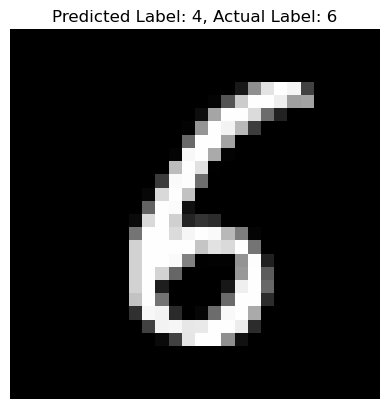

In [65]:
# Get one test image and its label
image, label = images[1], labels[1]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[1]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()



Further experimentation with model architecture, optimizers, and regularization techniques could potentially improve performance beyond the current result.

### Step 4.One of the proposed modifications below: Increase the current number of nodes in the layer to 256  nodes
Hypothesize how it would change the performance results?

### Hypothesis
### In this case, Increasing the current number of nodes in the layer to 256: 
- With increase in nodes from 128 to 256 nodes the network should be able to capture more patterns in the data than with 128 nodes, potentially improving performance on complex tasks or larger datasets.

Step 5. Modify the model based on the chosen method and train

In [70]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)  # Changed from 128 to 256
        self.fc2 = nn.Linear(256, 64)       # Updated input size to 256 to match fc1's output size
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = MLP()
print(model)

MLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [80]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 0.06905673784669489
Epoch 1, Batch 200, Loss: 0.07731718733441084
Epoch 1, Batch 300, Loss: 0.07227643823483959
Epoch 1, Batch 400, Loss: 0.06974336553364992
Epoch 1, Batch 500, Loss: 0.06796841453993693
Epoch 1, Batch 600, Loss: 0.07688596389256418
Epoch 1, Batch 700, Loss: 0.07492174223996699
Epoch 1, Batch 800, Loss: 0.07354238281026483
Epoch 1, Batch 900, Loss: 0.08953806438483297
Epoch 2, Batch 100, Loss: 0.047462991760112344
Epoch 2, Batch 200, Loss: 0.07254781841067598
Epoch 2, Batch 300, Loss: 0.0630319649213925
Epoch 2, Batch 400, Loss: 0.05263380414107814
Epoch 2, Batch 500, Loss: 0.06388017681892962
Epoch 2, Batch 600, Loss: 0.07927875078748911
Epoch 2, Batch 700, Loss: 0.05163418082054704
Epoch 2, Batch 800, Loss: 0.06942413487005979
Epoch 2, Batch 900, Loss: 0.06943638281896711
Epoch 3, Batch 100, Loss: 0.043689871069509535
Epoch 3, Batch 200, Loss: 0.05400549648911692
Epoch 3, Batch 300, Loss: 0.05164327190257609
Epoch 3, Batch 400, Loss: 0.05664

In [82]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { correct / total}%')

Accuracy on test set: 0.9723666666666667%


Step 6. Report on the results of the modified model and if it matches your hypothesis

#### **Results of the Modified Model:**
- **Previous Test Accuracy (before modification)**: 96.43% 
- **New Test Accuracy (after increasing the number of neurons in the hidden layer from 128 to 256)**: **97.24%**

##### **Hypothesis**:
We predicted that increasing the number of neurons in the hidden layer from 128 to 256 would increase the capacity of the network to learn more complex patterns in the data and will potentially improve the performance.
##### **Outcome**:
The test accuracy improved by **0.80%** (from 96.43% to 97.24%), which is consistent with the hypothesis and it indicates that increasing the number of nodes helped model to utilize the increase capacity to learn better representations of the data which lead to better generalization on the test set.

### **Conclusion**:
The result matches the hypothesis without overfitting, leading to an increase in test accuracy and helped the model achieve better performance

Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

In [100]:
# Define the MLP model with dynamic activation function and dropout
class MLP(nn.Module):
    def __init__(self, activation_fn=nn.ReLU, dropout_rate=0.0, loss_function=nn.CrossEntropyLoss):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(256, 64)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(64, 10)
        self.activation_fn = activation_fn()
        self.loss_function = loss_function

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.activation_fn(self.fc1(x))
        x = self.dropout1(x)
        x = self.activation_fn(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc4(x)
        if isinstance(self.loss_function, nn.NLLLoss):
            x = torch.log_softmax(x, dim=1)  # Apply log-softmax for NLLLoss
        return x

In [102]:
# Function to choose optimizer
def get_optimizer(optimizer_name, model):
    if optimizer_name == 'adam':
        return optim.Adam(model.parameters(), lr=0.001)
    elif optimizer_name == 'sgd':
        return optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    elif optimizer_name == 'rmsprop':
        return optim.RMSprop(model.parameters(), lr=0.001)
    else:
        raise ValueError("Unknown optimizer")

In [104]:
# Training loop
def train_model(model, train_loader, criterion, optimizer, epochs=5):
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if i % 100 == 99:  # print every 100 mini-batches
                print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
                running_loss = 0.0
    print('Finished Training')

In [106]:
# Evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total * 100
    print(f'Accuracy on test set: {accuracy:.2f}%')
    return accuracy

In [108]:
# Function to run experiments on both hyperparameter lists
def run_experiment(hyperparameters):
    for optimizer_name in hyperparameters['optimizers']:
        for loss_fn in hyperparameters['loss_functions']:
            for dropout_rate in hyperparameters['dropout_rates']:
                for activation_fn in hyperparameters['activation_functions']:
                    print(f"Experiment with: Optimizer={optimizer_name}, Loss={loss_fn.__class__.__name__}, Dropout={dropout_rate}, Activation={activation_fn.__name__}")
                    
                    # Initialize the model
                    model = MLP(activation_fn=activation_fn, dropout_rate=dropout_rate, loss_function=loss_fn)
                    
                    # Get the optimizer
                    optimizer = get_optimizer(optimizer_name, model)
                    
                    # Train the model
                    train_model(model, train_loader, loss_fn, optimizer, epochs=5)
                    
                    # Evaluate the model
                    accuracy = evaluate_model(model, test_loader)
                    print(f"Result: Accuracy = {accuracy:.2f}%")
                    print("-" * 50)

In [110]:
# Experiment lists for hyperparameters
hyperparameter_list_1 = {
    'optimizers': ['rmsprop'],
    'loss_functions': [nn.CrossEntropyLoss()],
    'dropout_rates': [0.2],
    'activation_functions': [nn.LeakyReLU, nn.Sigmoid]
}

hyperparameter_list_2 = {
    'optimizers': ['sgd'],
    'loss_functions': [nn.NLLLoss()],
    'dropout_rates': [0.3],
    'activation_functions': [nn.ReLU, nn.Tanh]
}

hyperparameter_list_3 = {
    'optimizers': ['adam'],
    'loss_functions': [nn.CrossEntropyLoss()],
    'dropout_rates': [0.4],
    'activation_functions': [nn.ReLU, nn.Sigmoid]
}

hyperparameter_list_4 = {
    'optimizers': ['sgd'],
    'loss_functions': [nn.CrossEntropyLoss()],
    'dropout_rates': [0.0],
    'activation_functions': [nn.ReLU, nn.Sigmoid]
}
# Run experiments with both hyperparameter lists
print("Running experiments for Hyperparameter List 1:")
run_experiment(hyperparameter_list_1)

print("\nRunning experiments for Hyperparameter List 2:")
run_experiment(hyperparameter_list_2)

print("\nRunning experiments for Hyperparameter List 3:")
run_experiment(hyperparameter_list_3)

print("\nRunning experiments for Hyperparameter List 4:")
run_experiment(hyperparameter_list_4)

Running experiments for Hyperparameter List 1:
Experiment with: Optimizer=rmsprop, Loss=CrossEntropyLoss, Dropout=0.2, Activation=LeakyReLU
Epoch 1, Batch 100, Loss: 1.1337432888150216
Epoch 1, Batch 200, Loss: 0.5158341240882873
Epoch 1, Batch 300, Loss: 0.4251799687743187
Epoch 1, Batch 400, Loss: 0.3848441827297211
Epoch 1, Batch 500, Loss: 0.3436297746002674
Epoch 1, Batch 600, Loss: 0.3199358186870813
Epoch 1, Batch 700, Loss: 0.2993918929994106
Epoch 1, Batch 800, Loss: 0.270193412527442
Epoch 1, Batch 900, Loss: 0.2510120403766632
Epoch 2, Batch 100, Loss: 0.24260803170502185
Epoch 2, Batch 200, Loss: 0.22601986669003962
Epoch 2, Batch 300, Loss: 0.23331793956458569
Epoch 2, Batch 400, Loss: 0.21184616539627313
Epoch 2, Batch 500, Loss: 0.22076430149376391
Epoch 2, Batch 600, Loss: 0.2049866520613432
Epoch 2, Batch 700, Loss: 0.21310178626328707
Epoch 2, Batch 800, Loss: 0.19103831101208926
Epoch 2, Batch 900, Loss: 0.21507610529661178
Epoch 3, Batch 100, Loss: 0.191081408821046

Based on the hyperparameters 
- SGD (no dropout, ReLU) has achieved the highest accuracy 96.70% on the test set. Without dropout and using ReLU seem to have positively impacted the performance.
- Dropouts have generally led to slightly lower accuracy in most hyperparameters accuracy (between 95.79% and 96.34%). which tells that overfitting was not a major issue for this dataset, and the model has benefitted from keeping more connections active during training.
- ReLU has consistently performed better across hyperparameter experiments by achieving accuracies above 96% in most cases.
- Sigmoid activation has led to lower performance in general. The model trained with SGD and Sigmoid without dropout had the lowest accuracy (92.77%).
- SGD and Adam performed comparably across different setups, with SGD slightly outperforming Adam in some cases.
- RMSprop showed good performance, especially when paired with LeakyReLU, achieving 96.73% accuracy.
- CrossEntropyLoss performed better than NLLLoss, likely due to its compatibility with the raw logits output by the model.

Conclusion: The best performaning hyperparameter experiment was achieved using SGD with ReLU and no dropout (96.70%). This suggests that the model trained well without the need for dropout, and the use of ReLU helped optimize learning.